In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 18,9
rcParams['font.family'] = 'AppleGothic' #malgun Gothic


# from google.colab import files     #colab 돌릴때
# uploaded = files.upload()          #colab 돌릴때

In [2]:
red = pd.read_csv("winequality-red.csv", sep=';')             # 구분자가 콤마, 가 아닌....  세미콜론;임
print(red.shape)
red.head()

(1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
import glob      # 묶어주는 라이브러리
import os        # 폴더를 컨트롤

In [4]:
all_files = glob.glob(os.path.join('wine*'))
all_files

['winequality-red.csv', 'winequality-white.csv']

In [5]:
all_data = []     # 모든 데이터를 저장하기 위해 빈리스트를 만들어둠

i=0

for file in all_files:
    data = pd.read_csv(file, sep=';')
    data['type']=i
    all_data.append(data)
    i+=1         # 타입을 확인함.   레드는 0, 화이트는 1로 정의하여 와인 구분함.
    
wine = pd.concat(all_data, ignore_index=True)      # 데이터를 합침concat, concat은 axis가 기본값이   0임,  
                                                    #기존인데스를 가지고 와서 6천여개중 4900여개로 표시됨, 그래서 기존 인데스 무시처리

In [6]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


In [7]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.753886
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,1.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,1.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


> **우리의 목표: 와인성분데이터를 넣으면 와인의 품질을 예측하는 모형

In [8]:
sorted(wine.quality.unique())             # 목표 변수

[3, 4, 5, 6, 7, 8, 9]

In [9]:
wine.quality.value_counts()               # 값 별 카운트

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [10]:
wine[wine.quality ==9]                   # 특정 값을 지는 리스트를 보고 싶어

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
2373,9.1,0.27,0.45,10.6,0.035,28.0,124.0,0.99700,3.20,0.46,10.4,9,1
2419,6.6,0.36,0.29,1.6,0.021,24.0,85.0,0.98965,3.41,0.61,12.4,9,1
2426,7.4,0.24,0.36,2.0,0.031,27.0,139.0,0.99055,3.28,0.48,12.5,9,1
2475,6.9,0.36,0.34,4.2,0.018,57.0,119.0,0.98980,3.28,0.36,12.7,9,1
3204,7.1,0.26,0.49,2.2,0.032,31.0,113.0,0.99030,3.37,0.42,12.9,9,1


### 탐색적분석  ------------------------
- 레드와인인지 화이트와인인지에 따라 품질이 다를까?

In [11]:
wine.groupby('type').quality.describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
0,1599.0,5.636023,0.807569,3.0,5.0,6.0,6.0,8.0
1,4898.0,5.877909,0.885639,3.0,5.0,6.0,6.0,9.0


In [12]:
red_quality = wine.loc[wine.type == 0, 'quality']


In [13]:
white_quality = wine.loc[wine.type==1, 'quality']


C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='quality', ylabel='Density'>

findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


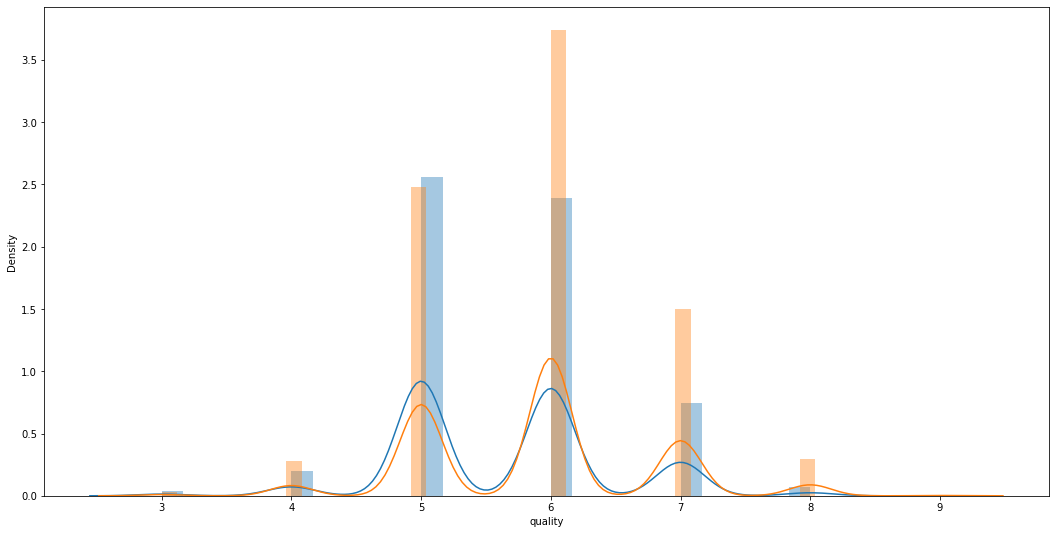

In [14]:
sns.distplot(red_quality, label='Red')
sns.distplot(white_quality, label="White")

### T검정
- 와인종류에 따른 품질의 차이가 통계적으로 유의한지 확인하기 위함
- p value < 0.05     그래야 유의미한 의미임 95%  ******

In [15]:
import statsmodels.api as sm

In [16]:
tstat, pvalue, df = sm.stats.ttest_ind(red_quality, white_quality)

In [17]:
print("T값은 %.5f, p-value는 %.8f"%(tstat, pvalue))

T값은 -9.68565, p-value는 0.00000000


### 상관관계분석

In [18]:
wine.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743,-0.486740
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699,-0.653036
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532,0.187397
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980,0.348821
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666,-0.512678
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463,0.471644
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385,0.700357
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858,-0.390645
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506,-0.329129
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485,-0.487218


<AxesSubplot:>

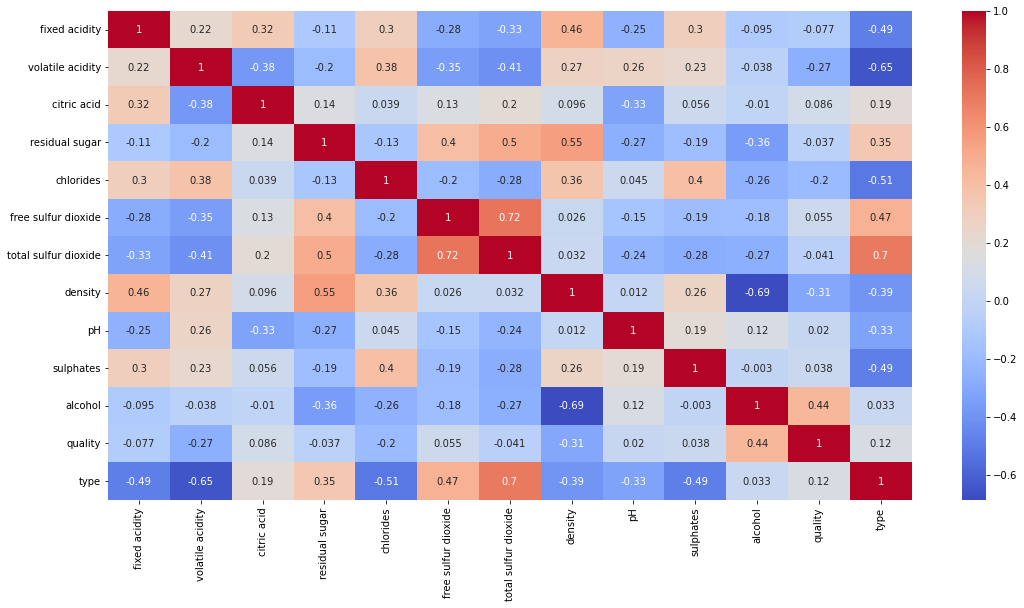

In [19]:
sns.heatmap(wine.corr(), annot=True, cmap='coolwarm')

In [20]:
#너무 상관관계가 높은 아이들끼리는 같이 쓰지말고 둘중 하나를 쓰는게 좋음 공분산도가 높아짐

In [21]:
wine.corrwith(wine.quality).sort_values()

density                -0.305858
volatile acidity       -0.265699
chlorides              -0.200666
fixed acidity          -0.076743
total sulfur dioxide   -0.041385
residual sugar         -0.036980
pH                      0.019506
sulphates               0.038485
free sulfur dioxide     0.055463
citric acid             0.085532
type                    0.119323
alcohol                 0.444319
quality                 1.000000
dtype: float64

### 산점도 pairplot
- 모든 회귀문제는 산점도가 있어야 파악이 용이
- 하지만 모든 점을 산점도를 그리면   성능문제발생,   그래서 샘플링을 하여 산점도로 변수간 관계를 만듦

In [22]:
def sampling(data, n=300):         #와인 샘플링
    return data.loc[np.random.choice(data.index, size=n, replace=False)]        #choice  인덱스 골라냄,  replace 중복미허용F

In [23]:
red = wine[wine.type ==0]
white = wine[wine.type ==1]

In [24]:
red_sample = sampling(red)
print(red_sample.shape)
red_sample.head()

(300, 13)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
749,7.3,0.51,0.18,2.1,0.070,12.0,28.0,0.99768,3.52,0.73,9.5,6,0
1541,7.4,0.25,0.29,2.2,0.054,19.0,49.0,0.99666,3.40,0.76,10.9,7,0
878,8.8,0.61,0.19,4.0,0.094,30.0,69.0,0.99787,3.22,0.50,10.0,6,0
852,8.0,0.42,0.32,2.5,0.080,26.0,122.0,0.99801,3.22,1.07,9.7,5,0
62,7.5,0.52,0.16,1.9,0.085,12.0,35.0,0.99680,3.38,0.62,9.5,7,0


In [25]:
white_sample = sampling(white)
print(white_sample.shape)
white_sample.head()

(300, 13)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
2227,7.0,0.32,0.24,6.2,0.048,31.0,228.0,0.99570,3.23,0.62,9.40,6,1
2106,6.0,0.24,0.27,1.9,0.048,40.0,170.0,0.99380,3.64,0.54,10.00,7,1
6032,6.9,0.56,0.26,10.9,0.060,55.0,193.0,0.99690,3.21,0.44,9.40,5,1
6239,6.0,0.24,0.41,1.3,0.036,42.0,118.0,0.99018,3.04,0.64,11.75,6,1
3588,7.1,0.33,0.30,3.3,0.034,30.0,102.0,0.99120,3.08,0.31,12.30,7,1


In [26]:
wine_sample = pd.concat([red_sample, white_sample])

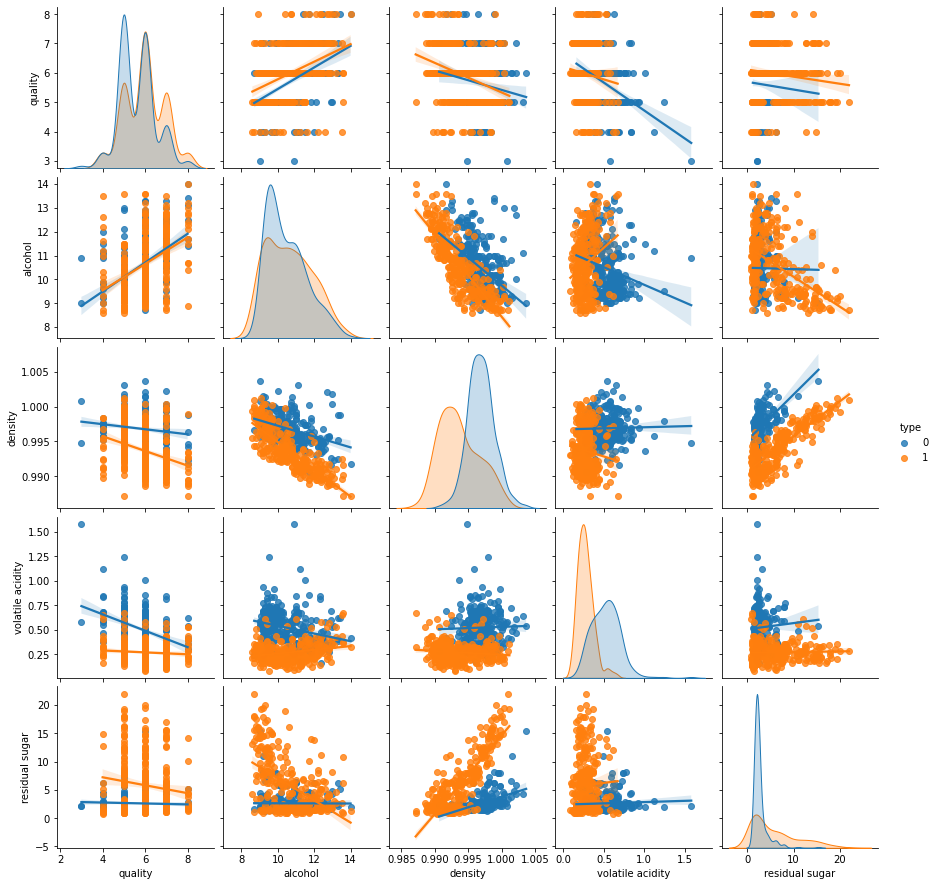

In [27]:
sns.pairplot(wine_sample, hue='type', kind='reg',
            vars=['quality', 'alcohol', 'density', 'volatile acidity', 'residual sugar'])     #pairplot 회귀문제에서 꼭 필요***

### .
- 선형회귀모형  만들기

In [28]:
wine.columns = wine.columns.str.replace(' ','_')

In [29]:
wine.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type'],
      dtype='object')

In [30]:
features = ['fixed_acidity', 'volatile_acidity', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'type']            #예측모델을 만들기 위해 핏쳐 셀렉션을 함

In [31]:
# features_B = ['volatile_acidity', 'residual_sugar','density','alcohol', 'type']

In [32]:
# features_C = ['volatile_acidity', 'residual_sugar','density','alcohol', 'type', 'density']

In [33]:
# features_D = ['volatile_acidity', 'residual_sugar','density','alcohol', 'type', 'density','fixed_acidity']

In [34]:
# features_E = ['volatile_acidity', 'residual_sugar','density','alcohol', 'type', 'density','fixed_acidity', 'chlorides']

In [35]:
# features_F = ['volatile_acidity', 'residual_sugar','density','alcohol', 'type', 'density','fixed_acidity', 'chlorides', 'free_sulfur_dioxide']

In [36]:
# features_G = ['volatile_acidity', 'residual_sugar','density','alcohol', 'type', 'density','fixed_acidity', 'chlorides', 'free_sulfur_dioxide', 'pH']

In [37]:
# features_H = ['volatile_acidity', 'residual_sugar','density','alcohol', 'type', 'density','fixed_acidity', 'chlorides', 'free_sulfur_dioxide', 'pH', 'sulphates']

In [38]:
# features_Z = ['volatile_acidity', 'residual_sugar','density','alcohol', 'type', 'density','fixed_acidity', 'chlorides', 'free_sulfur_dioxide', 'pH', 'sulphates', 'citric_acid']

In [39]:
y = wine.quality
X = wine[wine.columns.difference(['quality', 'type'])]
X_standard = (X - X.mean())/ X.std()    #표준화 : 단위기준을 맞춤
wine_standard = pd.concat([X_standard, wine.quality, wine.type], axis=1)

In [40]:
X = wine_standard[features]
# X_B = wine_standard[features_B]
# X_C = wine_standard[features_C]
# X_D = wine_standard[features_D]
# X_E = wine_standard[features_E]
# X_F = wine_standard[features_F]
# X_G = wine_standard[features_G]
# X_H = wine_standard[features_H]
# X_Z = wine_standard[features_Z]

# 훈련데이터셋과 테스트데이터셋으로 나누자
### 회귀분석의 경우는.... 훈련데이터셋과 테스트 데이터 셋을 나누어야 함

In [41]:
from sklearn.model_selection import train_test_split                   #머신러닝 라이브러리는 사이킷런에 있음

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, wine.quality, train_size=0.8, random_state=31)

# X_B_train, X_B_test, y_B_train, y_B_test = train_test_split(X_B, wine.quality, train_size=0.8, random_state=31)
# X_C_train, X_C_test, y_C_train, y_C_test = train_test_split(X_C, wine.quality, train_size=0.8, random_state=31)
# X_D_train, X_D_test, y_D_train, y_D_test = train_test_split(X_D, wine.quality, train_size=0.8, random_state=31)
# X_E_train, X_E_test, y_E_train, y_E_test = train_test_split(X_E, wine.quality, train_size=0.8, random_state=31)
# X_F_train, X_F_test, y_F_train, y_F_test = train_test_split(X_F, wine.quality, train_size=0.8, random_state=31)
# X_G_train, X_G_test, y_G_train, y_G_test = train_test_split(X_G, wine.quality, train_size=0.8, random_state=31)
# X_H_train, X_H_test, y_H_train, y_H_test = train_test_split(X_H, wine.quality, train_size=0.8, random_state=31)
# X_Z_train, X_Z_test, y_Z_train, y_Z_test = train_test_split(X_Z, wine.quality, train_size=0.8, random_state=31)


In [43]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5197, 10)
(1300, 10)
(5197,)
(1300,)


In [44]:
# print(X_H_train.shape)
# print(X_H_test.shape)
# print(y_H_train.shape)
# print(y_H_test.shape)

In [45]:
# print(X_Z_train.shape)
# print(X_Z_test.shape)
# print(y_Z_train.shape)
# print(y_Z_test.shape)

In [46]:
# 모델정의


In [47]:
from sklearn.linear_model import LinearRegression

In [48]:
model = LinearRegression()

In [49]:
# model_H = LinearRegression()

In [50]:
# model_Z = LinearRegression()

In [51]:
model.fit(X_train, y_train)

LinearRegression()

In [52]:
# model_H.fit(X_H_train, y_H_train)

In [53]:
# model_Z.fit(X_Z_train, y_Z_train)

In [54]:
# prediction = model.predict(X_test)

In [55]:
# prediction_H = model_H.predict(X_H_test)

In [56]:
# prediction_Z = model_Z.predict(X_Z_test)

In [57]:
# prediction

In [58]:
# prediction_H

In [59]:
# prediction_Z

### 모델평가

In [60]:
from sklearn import metrics

In [61]:
# metrics.mean_absolute_error(y_test, prediction)

In [62]:
# metrics.mean_absolute_error(y_H_test, prediction_H)

In [63]:
# metrics.mean_absolute_error(y_Z_test, prediction_Z)

In [64]:
# metrics.mean_squared_error(y_test, prediction)                 #  오류율이 낮아야 좋은 모델    

In [65]:
# metrics.mean_squared_error(y_H_test, prediction_H)

In [66]:
# metrics.mean_squared_error(y_Z_test, prediction_Z)

### 하단 개인작업구간

### 숫자를 떨어뜨려라  (과제)
- 1. 그전에 핏쳐의 셀렉션과 조합, 핏처 엔지니어링... 등
- 2. 하이퍼 파라메터 수정해가며 수정
- 3. 랜덤포레스트 이용.

> **metrics.mean_squared_error(y_test, prediction)   오류율 낮추기 

In [67]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

In [68]:
# test_model = RandomForestRegressor(n_estimators = 300, 
#                                   max_depth = 20, 
#                                   max_features =0.7,
#                                   random_state=31)

In [69]:
# test_model = RandomForestRegressor(n_estimators = 300, 
#                                    max_depth = 15, 
#                                    max_features =0.7,
#                                    random_state=51)

In [70]:
# test_model = RandomForestRegressor(n_estimators = 300, 
#                                    max_depth = 10, 
#                                    max_features =0.7,
#                                    random_state=51)

In [71]:
# test_model = RandomForestRegressor(n_estimators = 300, 
#                                    max_depth = 5, 
#                                    max_features =0.7,
#                                    random_state=51)

In [72]:
# cross_val_score(test_model, X_train, y_train, scoring= 'neg_mean_squared_error', cv=5)                 #'neg_mean_squared_error'

In [73]:
# cross_val_score(test_model, X_train, y_train, scoring= 'neg_mean_squared_error', cv=10)                 #'neg_mean_squared_error'

In [74]:
# cross_val_score(test_model, X_train, y_train, scoring= 'neg_mean_squared_error', cv=15)                 #'neg_mean_squared_error'

In [75]:
# cross_val_score(test_model, X_train, y_train, scoring= 'neg_mean_squared_error', cv=20)                 #'neg_mean_squared_error'

In [76]:
# cross_val_score(test_model, X_train, y_train, scoring= 'neg_mean_squared_error', cv=25)                 #'neg_mean_squared_error'

In [77]:
# cross_val_score(test_model, X_train, y_train, scoring= 'neg_mean_squared_error', cv=30)                 #'neg_mean_squared_error'

In [78]:
# cross_val_score(test_model, X_train, y_train, scoring= 'neg_mean_squared_error', cv=40)                 #'neg_mean_squared_error'

In [79]:
# cross_val_score(test_model, X_train, y_train, scoring= 'neg_mean_squared_error', cv=50)                 #'neg_mean_squared_error'

In [80]:
# cross_val_score(test_model, X_train, y_train, scoring= 'neg_mean_squared_error', cv=5).mean()

In [81]:
# cross_val_score(test_model, X_train, y_train, scoring= 'neg_mean_squared_error', cv=10).mean()

In [82]:
# cross_val_score(test_model, X_train, y_train, scoring= 'neg_mean_squared_error', cv=15).mean()

In [83]:
# cross_val_score(test_model, X_train, y_train, scoring= 'neg_mean_squared_error', cv=20).mean()

In [84]:
# cross_val_score(test_model, X_train, y_train, scoring= 'neg_mean_squared_error', cv=25).mean()

In [85]:
# cross_val_score(test_model, X_train, y_train, scoring= 'neg_mean_squared_error', cv=30).mean()

In [86]:
# cross_val_score(test_model, X_train, y_train, scoring= 'neg_mean_squared_error', cv=40).mean()

In [87]:
# cross_val_score(test_model, X_train, y_train, scoring= 'neg_mean_squared_error', cv=50).mean()

# 하이퍼 파라메터 시작...


In [88]:
from tqdm import tqdm

hyper_result =[]

# max_depth = [3,5,7,9,11,13]
# max_feature = [0.7,0.8,0.9,1.0]


# for a in max_depth:
#     for b in max_feature:

#         model_E = RandomForestRegressor(n_estimators = 500, 
#                                       max_depth = a, 
#                                       max_features =b,
#                                       min_samples_split=2,
#                                       min_samples_leaf=1,
#                                       random_state=31)

for i in tqdm(range(100)):
    a = np.random.randint(5,80)
    b = np.random.uniform(0.2,0.9)
    model = RandomForestRegressor(n_estimators = 400, 
                                  max_depth = a, 
                                  max_features =b,
                                  min_samples_split=3,
                                  min_samples_leaf=1,
                                  random_state=31,
                                  n_jobs=-1)

    score = cross_val_score(model, X_train, y_train, scoring= 'neg_mean_squared_error', cv=20).mean()

    hyper_result.append({'점수' : score,
                         'n_estimators' : 400,
                         'MAX_depth': a,
                         'MAX_features': b})
              

    print("현재 스코어는 {0:.5f}".format(score))


  1%|          | 1/100 [00:13<22:58, 13.93s/it]

현재 스코어는 -0.37641


  2%|▏         | 2/100 [00:28<22:58, 14.07s/it]

현재 스코어는 -0.37860


  3%|▎         | 3/100 [00:39<20:37, 12.75s/it]

현재 스코어는 -0.37642


  4%|▍         | 4/100 [00:53<21:24, 13.38s/it]

현재 스코어는 -0.37868


  5%|▌         | 5/100 [01:05<20:06, 12.70s/it]

현재 스코어는 -0.37643


  6%|▌         | 6/100 [01:15<18:44, 11.96s/it]

현재 스코어는 -0.37913


  7%|▋         | 7/100 [01:29<19:37, 12.66s/it]

현재 스코어는 -0.37819


  8%|▊         | 8/100 [01:44<20:35, 13.43s/it]

현재 스코어는 -0.37870


  9%|▉         | 9/100 [01:53<18:06, 11.94s/it]

현재 스코어는 -0.45091


 10%|█         | 10/100 [02:06<18:14, 12.16s/it]

현재 스코어는 -0.37967


 11%|█         | 11/100 [02:20<19:13, 12.96s/it]

현재 스코어는 -0.39104


 12%|█▏        | 12/100 [02:31<17:55, 12.23s/it]

현재 스코어는 -0.37480


 13%|█▎        | 13/100 [02:40<16:10, 11.16s/it]

현재 스코어는 -0.51183


 14%|█▍        | 14/100 [02:49<15:21, 10.71s/it]

현재 스코어는 -0.38931


 15%|█▌        | 15/100 [03:05<17:14, 12.17s/it]

현재 스코어는 -0.38136


 16%|█▌        | 16/100 [03:21<18:37, 13.31s/it]

현재 스코어는 -0.38136


 17%|█▋        | 17/100 [03:34<18:32, 13.40s/it]

현재 스코어는 -0.40876


 18%|█▊        | 18/100 [03:47<18:04, 13.23s/it]

현재 스코어는 -0.37715


 19%|█▉        | 19/100 [04:00<17:30, 12.97s/it]

현재 스코어는 -0.37967


 20%|██        | 20/100 [04:13<17:29, 13.12s/it]

현재 스코어는 -0.37819


 21%|██        | 21/100 [04:27<17:24, 13.23s/it]

현재 스코어는 -0.37863


 22%|██▏       | 22/100 [04:41<17:41, 13.61s/it]

현재 스코어는 -0.37831


 23%|██▎       | 23/100 [04:51<16:04, 12.53s/it]

현재 스코어는 -0.37512


 24%|██▍       | 24/100 [05:03<15:33, 12.29s/it]

현재 스코어는 -0.37641


 25%|██▌       | 25/100 [05:15<15:25, 12.35s/it]

현재 스코어는 -0.37713


 26%|██▌       | 26/100 [05:29<15:45, 12.78s/it]

현재 스코어는 -0.37819


 27%|██▋       | 27/100 [05:40<14:48, 12.17s/it]

현재 스코어는 -0.37512


 28%|██▊       | 28/100 [05:50<13:52, 11.56s/it]

현재 스코어는 -0.37504


 29%|██▉       | 29/100 [06:02<13:56, 11.78s/it]

현재 스코어는 -0.41896


 30%|███       | 30/100 [06:18<14:58, 12.84s/it]

현재 스코어는 -0.37871


 31%|███       | 31/100 [06:30<14:38, 12.73s/it]

현재 스코어는 -0.37642


 32%|███▏      | 32/100 [06:41<13:41, 12.09s/it]

현재 스코어는 -0.37512


 33%|███▎      | 33/100 [06:55<14:09, 12.68s/it]

현재 스코어는 -0.37819


 34%|███▍      | 34/100 [07:05<13:17, 12.09s/it]

현재 스코어는 -0.37864


 35%|███▌      | 35/100 [07:13<11:32, 10.66s/it]

현재 스코어는 -0.54098


 36%|███▌      | 36/100 [07:28<12:57, 12.15s/it]

현재 스코어는 -0.37871


 37%|███▋      | 37/100 [07:42<13:06, 12.49s/it]

현재 스코어는 -0.37715


 38%|███▊      | 38/100 [07:53<12:28, 12.07s/it]

현재 스코어는 -0.37473


 39%|███▉      | 39/100 [08:04<12:09, 11.96s/it]

현재 스코어는 -0.40012


 40%|████      | 40/100 [08:16<11:58, 11.98s/it]

현재 스코어는 -0.37641


 41%|████      | 41/100 [08:30<12:13, 12.43s/it]

현재 스코어는 -0.37715


 42%|████▏     | 42/100 [08:43<12:09, 12.57s/it]

현재 스코어는 -0.37834


 43%|████▎     | 43/100 [08:59<12:53, 13.56s/it]

현재 스코어는 -0.37871


 44%|████▍     | 44/100 [09:16<13:35, 14.56s/it]

현재 스코어는 -0.38136


 45%|████▌     | 45/100 [09:27<12:25, 13.56s/it]

현재 스코어는 -0.37473


 46%|████▌     | 46/100 [09:38<11:33, 12.85s/it]

현재 스코어는 -0.37473


 47%|████▋     | 47/100 [09:49<10:42, 12.13s/it]

현재 스코어는 -0.37512


 48%|████▊     | 48/100 [09:59<10:00, 11.55s/it]

현재 스코어는 -0.37580


 49%|████▉     | 49/100 [10:15<11:07, 13.09s/it]

현재 스코어는 -0.38136


 50%|█████     | 50/100 [10:29<11:07, 13.34s/it]

현재 스코어는 -0.37715


 51%|█████     | 51/100 [10:41<10:24, 12.75s/it]

현재 스코어는 -0.37461


 52%|█████▏    | 52/100 [10:53<10:04, 12.59s/it]

현재 스코어는 -0.37640


 53%|█████▎    | 53/100 [11:08<10:29, 13.39s/it]

현재 스코어는 -0.37871


 54%|█████▍    | 54/100 [11:25<11:03, 14.42s/it]

현재 스코어는 -0.38137


 55%|█████▌    | 55/100 [11:35<09:43, 12.97s/it]

현재 스코어는 -0.43294


 56%|█████▌    | 56/100 [11:49<09:49, 13.40s/it]

현재 스코어는 -0.38042


 57%|█████▋    | 57/100 [12:00<09:01, 12.60s/it]

현재 스코어는 -0.37513


 58%|█████▊    | 58/100 [12:11<08:34, 12.24s/it]

현재 스코어는 -0.37744


 59%|█████▉    | 59/100 [12:24<08:28, 12.41s/it]

현재 스코어는 -0.37641


 60%|██████    | 60/100 [12:38<08:42, 13.05s/it]

현재 스코어는 -0.37817


 61%|██████    | 61/100 [12:52<08:32, 13.14s/it]

현재 스코어는 -0.37715


 62%|██████▏   | 62/100 [13:05<08:21, 13.19s/it]

현재 스코어는 -0.37715


 63%|██████▎   | 63/100 [13:17<07:58, 12.94s/it]

현재 스코어는 -0.37641


 64%|██████▍   | 64/100 [13:33<08:16, 13.78s/it]

현재 스코어는 -0.37871


 65%|██████▌   | 65/100 [13:50<08:36, 14.77s/it]

현재 스코어는 -0.38136


 66%|██████▌   | 66/100 [14:02<07:52, 13.90s/it]

현재 스코어는 -0.37473


 67%|██████▋   | 67/100 [14:18<07:57, 14.47s/it]

현재 스코어는 -0.37871


 68%|██████▊   | 68/100 [14:29<07:05, 13.30s/it]

현재 스코어는 -0.37516


 69%|██████▉   | 69/100 [14:42<06:53, 13.34s/it]

현재 스코어는 -0.37715


 70%|███████   | 70/100 [14:58<07:02, 14.08s/it]

현재 스코어는 -0.37871


 71%|███████   | 71/100 [15:13<06:54, 14.28s/it]

현재 스코어는 -0.37819


 72%|███████▏  | 72/100 [15:24<06:16, 13.43s/it]

현재 스코어는 -0.37496


 73%|███████▎  | 73/100 [15:37<05:57, 13.26s/it]

현재 스코어는 -0.40063


 74%|███████▍  | 74/100 [15:54<06:13, 14.36s/it]

현재 스코어는 -0.38136


 75%|███████▌  | 75/100 [16:09<06:08, 14.75s/it]

현재 스코어는 -0.37872


 76%|███████▌  | 76/100 [16:24<05:50, 14.61s/it]

현재 스코어는 -0.37693


 77%|███████▋  | 77/100 [16:35<05:16, 13.76s/it]

현재 스코어는 -0.37533


 78%|███████▊  | 78/100 [16:47<04:49, 13.15s/it]

현재 스코어는 -0.37473


 79%|███████▉  | 79/100 [17:04<05:01, 14.36s/it]

현재 스코어는 -0.38136


 80%|████████  | 80/100 [17:22<05:06, 15.34s/it]

현재 스코어는 -0.38136


 81%|████████  | 81/100 [17:33<04:24, 13.94s/it]

현재 스코어는 -0.37694


 82%|████████▏ | 82/100 [17:45<04:00, 13.35s/it]

현재 스코어는 -0.41856


 83%|████████▎ | 83/100 [17:52<03:18, 11.68s/it]

현재 스코어는 -0.51710


 84%|████████▍ | 84/100 [18:09<03:28, 13.05s/it]

현재 스코어는 -0.37871


 85%|████████▌ | 85/100 [18:23<03:20, 13.37s/it]

현재 스코어는 -0.41884


 86%|████████▌ | 86/100 [18:33<02:55, 12.54s/it]

현재 스코어는 -0.37512


 87%|████████▋ | 87/100 [18:45<02:39, 12.25s/it]

현재 스코어는 -0.37466


 88%|████████▊ | 88/100 [19:00<02:35, 12.93s/it]

현재 스코어는 -0.37830


 89%|████████▉ | 89/100 [19:11<02:16, 12.38s/it]

현재 스코어는 -0.37701


 90%|█████████ | 90/100 [19:28<02:18, 13.88s/it]

현재 스코어는 -0.38136


 91%|█████████ | 91/100 [19:44<02:09, 14.40s/it]

현재 스코어는 -0.37807


 92%|█████████▏| 92/100 [19:56<01:50, 13.78s/it]

현재 스코어는 -0.37473


 93%|█████████▎| 93/100 [20:10<01:37, 13.88s/it]

현재 스코어는 -0.37714


 94%|█████████▍| 94/100 [20:21<01:17, 12.95s/it]

현재 스코어는 -0.37512


 95%|█████████▌| 95/100 [20:37<01:09, 13.84s/it]

현재 스코어는 -0.37907


 96%|█████████▌| 96/100 [20:48<00:51, 12.92s/it]

현재 스코어는 -0.37512


 97%|█████████▋| 97/100 [21:03<00:41, 13.76s/it]

현재 스코어는 -0.37836


 98%|█████████▊| 98/100 [21:17<00:27, 13.73s/it]

현재 스코어는 -0.40063


 99%|█████████▉| 99/100 [21:33<00:14, 14.37s/it]

현재 스코어는 -0.37819


100%|██████████| 100/100 [21:44<00:00, 13.05s/it]

현재 스코어는 -0.37511


In [89]:
pd.DataFrame(hyper_result).sort_values(by='점수', ascending=False) 

,점수,n_estimators,MAX_depth,MAX_features
50,-0.374610,400,30,0.311594
86,-0.374661,400,33,0.378713
91,-0.374728,400,46,0.302536
77,-0.374728,400,48,0.389516
65,-0.374728,400,79,0.373777
...,...,...,...,...
54,-0.432935,400,10,0.476348
8,-0.450908,400,9,0.301259
12,-0.511828,400,5,0.831322
82,-0.517099,400,6,0.203253


In [139]:
print("최소에러율")
print(pd.DataFrame(hyper_result)['점수'].max())
# print(pd.DataFrame(hyper_result2)['점수'].max())
# print(pd.DataFrame(hyper_result_B)['점수'].max())
# print(pd.DataFrame(hyper_result_C)['점수'].max())
# print(pd.DataFrame(hyper_result_D)['점수'].max())
# print(pd.DataFrame(hyper_result_E)['점수'].max())
# print(pd.DataFrame(hyper_result_F)['점수'].max())
# print(pd.DataFrame(hyper_result_G)['점수'].max())
# print(pd.DataFrame(hyper_result_H)['점수'].max())
# print(pd.DataFrame(hyper_result_H2)['점수'].max())
# print(pd.DataFrame(hyper_result_Z)['점수'].max())
# print(pd.DataFrame(hyper_result_Z2)['점수'].max())

print(" ")
print("평균에러율")
print(pd.DataFrame(hyper_result)['점수'].mean())
# print(pd.DataFrame(hyper_result2)['점수'].mean())
# print(pd.DataFrame(hyper_result_B)['점수'].mean())
# print(pd.DataFrame(hyper_result_C)['점수'].mean())
# print(pd.DataFrame(hyper_result_D)['점수'].mean())
# print(pd.DataFrame(hyper_result_E)['점수'].mean())
# print(pd.DataFrame(hyper_result_F)['점수'].mean())
# print(pd.DataFrame(hyper_result_G)['점수'].mean())
# print(pd.DataFrame(hyper_result_H)['점수'].mean())
# print(pd.DataFrame(hyper_result_H2)['점수'].mean())
# print(pd.DataFrame(hyper_result_Z)['점수'].mean())
# print(pd.DataFrame(hyper_result_Z2)['점수'].mean())

최소에러율
-0.37461005467315645
 
평균에러율
-0.3856774638341184


In [91]:
# 최종 모델정의

In [92]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

In [93]:
Finalmodel = RandomForestRegressor()
# Finalmodel2 = RandomForestRegressor()
# Finalmodel_B = RandomForestRegressor()
# Finalmodel_C = RandomForestRegressor()
# Finalmodel_D = RandomForestRegressor()
# Finalmodel_E = RandomForestRegressor()
# Finalmodel_F = RandomForestRegressor()
# Finalmodel_G = RandomForestRegressor()
# Finalmodel_H = RandomForestRegressor()
# Finalmodel_H2 = RandomForestRegressor()
# Finalmodel_Z = RandomForestRegressor()
# Finalmodel_Z2 = RandomForestRegressor()

In [94]:
Finalmodel.fit(X_train, y_train)
# Finalmodel2.fit(X_train, y_train)
# Finalmodel_B.fit(X_B_train, y_B_train)
# Finalmodel_C.fit(X_C_train, y_C_train)
# Finalmodel_D.fit(X_D_train, y_D_train)
# Finalmodel_E.fit(X_E_train, y_E_train)
# Finalmodel_F.fit(X_F_train, y_F_train)
# Finalmodel_G.fit(X_G_train, y_G_train)
# Finalmodel_H.fit(X_H_train, y_H_train)
# Finalmodel_H2.fit(X_H_train, y_H_train)
# Finalmodel_Z.fit(X_H_train, y_H_train)
# Finalmodel_Z2.fit(X_H_train, y_H_train)

RandomForestRegressor()

In [95]:
prediction = Finalmodel.predict(X_test)
# prediction2 = Finalmodel2.predict(X_test)

In [96]:
# prediction_B = Finalmodel_B.predict(X_B_test)
# prediction_C = Finalmodel_C.predict(X_C_test)
# prediction_D = Finalmodel_D.predict(X_D_test)
# prediction_E = Finalmodel_E.predict(X_E_test)
# prediction_F = Finalmodel_F.predict(X_F_test)
# prediction_G = Finalmodel_G.predict(X_G_test)
# prediction_H = Finalmodel_H.predict(X_H_test)
# prediction_H2 = Finalmodel_H2.predict(X_H_test)
# prediction_Z = Finalmodel_H.predict(X_H_test)
# prediction_Z2 = Finalmodel_H2.predict(X_H_test)

In [97]:
prediction

array([5.97, 5.82, 6.84, ..., 5.84, 6.49, 5.49])

In [98]:
# prediction2

In [99]:
# prediction_B

In [100]:
# prediction_C

In [101]:
# prediction_D

In [102]:
# prediction_E

In [103]:
# prediction_F

In [104]:
# prediction_G

In [105]:
# prediction_H

In [106]:
# prediction_H2

In [107]:
# prediction_Z

In [108]:
# prediction_Z2

### 모델평가

In [109]:
from sklearn import metrics

In [110]:
metrics.mean_squared_error(y_test, prediction)                 #  오류율이 낮아야 좋은 모델    

0.35485130769230766

In [111]:
# metrics.mean_squared_error(y_test, prediction2)                 #  오류율이 낮아야 좋은 모델    

In [112]:
# metrics.mean_squared_error(y_B_test, prediction_B)   

In [113]:
# metrics.mean_squared_error(y_C_test, prediction_C) 

In [114]:
# metrics.mean_squared_error(y_D_test, prediction_D) 

In [115]:
# metrics.mean_squared_error(y_E_test, prediction_E) 

In [116]:
# metrics.mean_squared_error(y_F_test, prediction_F) 

In [117]:
# metrics.mean_squared_error(y_G_test, prediction_G) 

In [118]:
# metrics.mean_squared_error(y_H_test, prediction_H)          

In [119]:
# metrics.mean_squared_error(y_H_test, prediction_H2)          

In [120]:
# metrics.mean_squared_error(y_Z_test, prediction_Z)

In [121]:
# metrics.mean_squared_error(y_Z2_test, prediction_Z2)

### 상단 개인작업구간

In [122]:
from statsmodels.formula.api import ols       #statsmodel:   모든 통계 공식이 들어있음.   ols:최소제곱법

In [123]:
formula = 'quality ~ alcohol + density + residual_sugar + type + volatile_acidity + chlorides'   #이꼴 표시이나 물결로 함

In [124]:
formula_all = 'quality ~ fixed_acidity + volatile_acidity + residual_sugar + chlorides + free_sulfur_dioxide + total_sulfur_dioxide + density + pH + sulphates + alcohol + type'

#코드를 거쳐 한 번 전체 확인 후(pvalue등...)  불필요한 증명력을 가진사항은 지워 봄

In [125]:

#  증명력을 추가적으로 확인해보아야 함


In [126]:
# formula_20220530 = 'quality ~  volatile_acidity + residual_sugar + chlorides + free_sulfur_dioxide + total_sulfur_dioxide + density +  sulphates + alcohol + type'
# # 임시제외 fixed_acidity + pH + 
# # #코드를 거쳐 한 번 전체 확인 후(pvalue등...)  불필요한 증명력을 가진사항은 지워 봄

In [127]:
# formula_20220530 = 'quality ~  fixed_acidity + volatile_acidity + residual_sugar + chlorides + free_sulfur_dioxide + total_sulfur_dioxide + density +  sulphates + alcohol + type'
# # 임시제외  pH + 
# # #코드를 거쳐 한 번 전체 확인 후(pvalue등...)  불필요한 증명력을 가진사항은 지워 봄

In [128]:
# formula_20220530 = 'quality ~  fixed_acidity + volatile_acidity +  chlorides + free_sulfur_dioxide + total_sulfur_dioxide + density +   alcohol + type'
# # 임시제외  residual_sugar + pH + sulphates +
# # #코드를 거쳐 한 번 전체 확인 후(pvalue등...)  불필요한 증명력을 가진사항은 지워 봄

In [129]:
formula_20220530 = 'quality ~  fixed_acidity + volatile_acidity + citric_acid + chlorides + free_sulfur_dioxide + total_sulfur_dioxide + density + alcohol + type + residual_sugar + pH + sulphates'
# 추가  citric_acid
# #코드를 거쳐 한 번 전체 확인 후(pvalue등...)  불필요한 증명력을 가진사항은 지워 봄

In [130]:
# formula_model = ols(formula, data=wine).fit()          #

In [131]:
# formula_model.summary()                                #R-squared는  설명력을 갖추었 다는 것

density  -33에 대한 확인
wine.head()
0.9978    이렇게 단위차이의 격차가 너무 차이남. 그래서 단위기준을 맞추어 주어야 함. 표준화

### ** 독립변수의 표준화
- 종속변수는 절대로 표준화를 하면 안됨

In [132]:
# formula_model = ols(formula, data=wine_standard).fit()

In [133]:
# formula_model.summary()

In [134]:
formula_all_model = ols(formula_all, data=wine_standard).fit()

In [135]:
formula_all_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.296
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                     248.4
Date:                Wed, 01 Jun 2022   Prob (F-statistic):               0.00
Time:                        13:19:39   Log-Likelihood:                -7195.5
No. Observations:                6497   AIC:                         1.442e+04
Df Residuals:                    6485   BIC:                         1.450e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                6.0939      0.044    139.896      0.000       6.009       6.179
fixed_acidity            0.1069      0.020      5.351      0.000       0.068       0.146
volatile_acidity        -0.2422      0.013    -19.180      0.000      -0.267      -0.217
residual_sugar           0.2977      0.028     10.548      0.000       0.242       0.353
chlorides               -0.0281      0.012     -2.428      0.015      -0.051      -0.005
free_sulfur_dioxide      0.0877      0.014      6.449      0.000       0.061       0.114
total_sulfur_dioxide    -0.0806      0.018     -4.428      0.000      -0.116      -0.045
density                 -0.3136      0.043     -7.307      0.000      -0.398      -0.229
pH                       0.0811      0.015      5.587      0.000       0.053       0.110
sulphates                0.1069      0.011      9.439      0.000       0.085       0.129
alcohol                  0.2635      0.021     12.315      0.000       0.222       0.305
type                    -0.3655      0.057     -6.468      0.000      -0.476      -0.255
==============================================================================
Omnibus:                      140.952   Durbin-Watson:                   1.647
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              313.758
Skew:                           0.017   Prob(JB):                     7.38e-69
Kurtosis:                       4.076   Cond. No.                         15.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [136]:
formula_20220530_result = ols(formula_20220530, data=wine_standard).fit()

In [137]:
formula_20220530_result.summary()              #citric_acid

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.297
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                     227.8
Date:                Wed, 01 Jun 2022   Prob (F-statistic):               0.00
Time:                        13:19:39   Log-Likelihood:                -7195.2
No. Observations:                6497   AIC:                         1.442e+04
Df Residuals:                    6484   BIC:                         1.450e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                6.0908      0.044    139.245      0.000       6.005       6.177
fixed_acidity            0.1103      0.020      5.396      0.000       0.070       0.150
volatile_acidity        -0.2457      0.013    -18.345      0.000      -0.272      -0.219
citric_acid             -0.0091      0.012     -0.786      0.432      -0.032       0.014
chlorides               -0.0265      0.012     -2.264      0.024      -0.049      -0.004
free_sulfur_dioxide      0.0876      0.014      6.443      0.000       0.061       0.114
total_sulfur_dioxide    -0.0793      0.018     -4.333      0.000      -0.115      -0.043
density                 -0.3116      0.043     -7.248      0.000      -0.396      -0.227
alcohol                  0.2656      0.022     12.320      0.000       0.223       0.308
type                    -0.3613      0.057     -6.367      0.000      -0.473      -0.250
residual_sugar           0.2971      0.028     10.522      0.000       0.242       0.352
pH                       0.0802      0.015      5.506      0.000       0.052       0.109
sulphates                0.1074      0.011      9.466      0.000       0.085       0.130
==============================================================================
Omnibus:                      140.992   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              313.985
Skew:                           0.016   Prob(JB):                     6.59e-69
Kurtosis:                       4.077   Cond. No.                         15.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [138]:
# citric_acid   을  fomula에 추가한 경우  R-squared:0.296 -> 0.297    증가됨을 확인 
# 금일부터 추가하여 분석진행